In [1]:
import numpy as np
import sys
import pickle
import pathlib
from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")


sys.path.append(join(dir_path, "HelperFiles"))
from helper import *
from rankshap import *
from train_models import *
from load_data import *

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import shap
import pandas as pd
X_display, y_display = shap.datasets.adult(display=True)
colnames = X_display.columns
d = len(colnames)


/Users/jeremygoldwasser/opt/anaconda3/envs/shap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load n_samples (created in commented-out chunk)

In [2]:
with open(join(dir_path, "Experiments", "Results", "alpha0.2", "n_samples"), "rb") as fp:
    lengths = pickle.load(fp)

In [3]:
# dataset = "census"
# data_path = join(dir_path, "Experiments", "Data")
# X_train, y_train, X_test, y_test, mapping_dict = load_data(data_path, dataset)

# model = train_neural_net(X_train, y_train)
# np.random.seed(1)
# K = 5
# i = 2
# N_runs = 20
# # i = 8 # 3% FWER, k=2
# xloc = X_test[i:(i+1)]
# shap_vals_all = []
# lengths = []
# top_K = []

# while len(top_K) < N_runs:
#     shap_vals, diffs, converged = rankshap(model, X_train, xloc, K=K, alpha=0.2, 
#                             mapping_dict=mapping_dict, max_n_perms=10000, n_init=100, n_equal=False)
#     if converged:
#         est_top_K = get_ranking(shap_vals)[:K]
#         top_K.append(est_top_K)
#         lens = [len(diffs[j]) for j in range(d)]
#         lengths.append(lens)
#         if len(lengths) % 2 == 0:
#             print(len(lengths))

# # Compute FWER
# print(np.round(calc_fwer(top_K), 1))

# with open(join(dir_path, "Experiments", "Results", "n_samples"), "wb") as fp:
#     pickle.dump(lengths, fp)


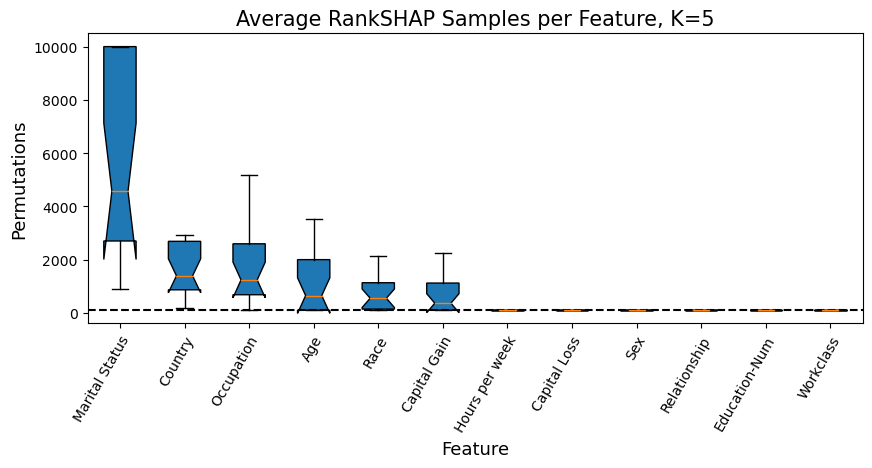

In [4]:
lengths = np.array(lengths)
meds = np.median(lengths, axis=0)
order = get_ranking(meds)

plt.figure(figsize=(10,5))
c = "blue"
plt.boxplot(lengths[:,order], showfliers=False, notch=True, patch_artist=True)

plt.xticks(np.arange(d)+1, colnames[order], rotation=60, rotation_mode='anchor', ha="right")
plt.axhline(100, color="black", linestyle="dashed")
plt.subplots_adjust(bottom=0.3)
plt.xlabel("Feature", size=13)
plt.ylabel("Permutations", size=13)
plt.title("Average RankSHAP Samples per Feature, K=5", size=15)
plt.savefig(join(dir_path, "Experiments", "Figures", "n_samples.png"), bbox_inches="tight")
plt.show()